# Aprendizagem - Homework III
### II. Programming - Grupo99
(ist1106059, ist1106329)

5- 

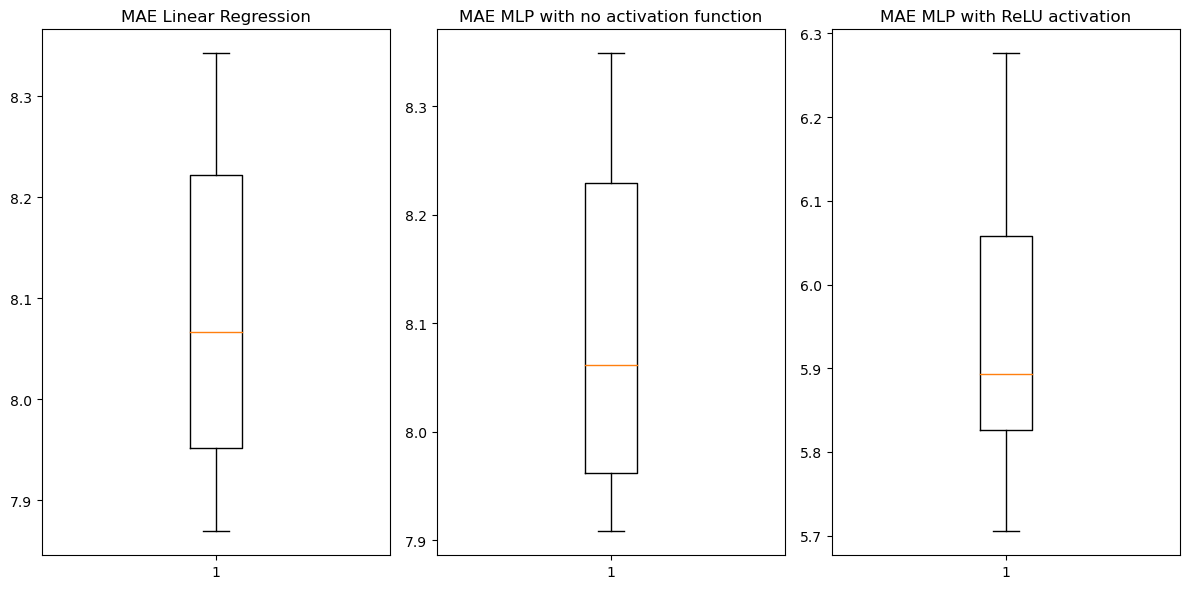

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error as MAE
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

data = pd.read_csv('parkinsons.csv')

# Separar features do target
X = data.drop(columns=['target'])
y = data['target']

# MAE's de cada modelo
mae_linear = []
mae_mlp_noAct = []
mae_mlp_relu = []

for i in range(1, 11):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    
    #Modelo de Regressão Linear
    linear_reg = LinearRegression().fit(X_train, y_train)
    mae_linear.append(MAE(y_test, linear_reg.predict(X_test)))
    
    #Regressor MLP sem funções de ativação
    mlp_noAct_reg = MLPRegressor(hidden_layer_sizes=(10, 10), 
                                 activation='identity', 
                                 random_state=0).fit(X_train, y_train)
    mae_mlp_noAct.append(MAE(y_test, mlp_noAct_reg.predict(X_test)))
    
    #Regressor MLP com funções de ativação ReLU
    mlp_relu_reg = MLPRegressor(hidden_layer_sizes=(10, 10), 
                                activation='relu', 
                                random_state=0).fit(X_train, y_train)
    mae_mlp_relu.append(MAE(y_test, mlp_relu_reg.predict(X_test)))


fig, axs = plt.subplots(1, 3, figsize=(12,6))

axs[0].boxplot(mae_linear)
axs[0].set_title('MAE Linear Regression')

axs[1].boxplot(mae_mlp_noAct)
axs[1].set_title('MAE MLP with no activation function')

axs[2].boxplot(mae_mlp_relu)
axs[2].set_title('MAE MLP with ReLU activation')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
import seaborn as sns

param_grid = {
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'batch_size': [32, 64, 128]
}

mlp_reg = MLPRegressor(hidden_layer_sizes=(10, 10), random_state=0) # ???????????????????????

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

grid_search = GridSearchCV(estimator=mlp_reg, param_grid=param_grid, scoring='neg_mean_absolute_error') # cv = ??
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
mae_grid = MAE(y_test, best_model.predict(X_test))

print(f"Melhores parâmetros: {best_params}")
print(f"MAE no conjunto de teste com o melhor modelo: {mae_grid}")

results = pd.DataFrame(grid_search.cv_results_)
results['param_combination'] = results['param_alpha'].astype(str) + ', ' + \
                               results['param_learning_rate_init'].astype(str) + ', ' + \
                               results['param_batch_size'].astype(str)

# Plotar o MAE (negativo) para cada combinação de hiperparâmetros
sns.barplot(x='param_combination', y='mean_test_score', data=results)
plt.xticks(rotation=90)
plt.title('MAE para Cada Combinação de Hiperparâmetros')
plt.ylabel('Mean Absolute Error (negativo)')
plt.show()